Hola **Macarena**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto 8

### Introducción

Contamos con datos de la empreza Zuber; compañía de viajes compartidos que se ha lanzado en Chicago. Se busca encontrar patrones en la información disponible respecto a preferencias de los pasajeros y el impacto que el clima puede tener en los viajes.

### Descripción de los datos

- company: tabla con datos de viajes de cada compañía.  
 *company_name:* nombre de la empresa de viajes  
 *trips_amunt:* número de viajes de cada empresa el 15 y 16 de noviembre  
 
- dropoff_location: tabla con barrios de Chicago en donde finalizan los viajes.  
 *dropoff_location_name:* barrios de Chicago donde finalizaron los viajes  
 *average_trips:* el promedio de duracion de cada viaje finalizado, el 17 de noviembre  
 
- airport_trips: tabla con datos de viajes desde Loop hacia el Aeropuerto internacional O'Hare  
 *start_ts:* fecha y hora de recogida  
 *weather_conditions:* condiciones climáticas en el momento en el que comenzó el viaje  
 *duration_seconds:* duración del viaje en segundos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por incluir esta sección introductoria de tu proyecto, esto ayuda a entender el porqué y cómo lo realizarás antes de pasar a ver el código. Continúa esta práctica!
</div>

### Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Cargar datos

In [2]:
company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_location_df = pd.read_csv('/datasets/project_sql_result_04.csv')
airport_trips_df = pd.read_csv('/datasets/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, cargaste todos tus datos e importaste las librerías de una manera muy ordenada
</div>

#### Preparar los datos

In [3]:
# Información de la tabla de viajes según empresa
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


No hay valores ausentes en la tabla

In [4]:
# Buscar duplicados explícitos
company_df.duplicated().sum()

0

Tampoco hay duplicados explicitos

In [5]:
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
# Valores estadísticos de la cantidad de viajes
company_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
# Información de la tabla con viajes según barrio de finalización
dropoff_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


No hay valores ausentes

In [8]:
# Hallar duplicados explícitos
dropoff_location_df.duplicated().sum()

0

No hay duplicados explícitos

In [9]:
dropoff_location_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
# Valores estadísticos de la duración promedio de viajes
dropoff_location_df.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
# Información de la tabla de viajes hacia el aeropuerto
airport_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


No hay valores ausentes en la tabla

In [12]:
# Buscar duplicados explícitos
airport_trips_df.duplicated().sum()

197

In [13]:
airport_trips_df[airport_trips_df.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


Los duplicados existentes son debido a que se repite la fecha, sin embargo la hora de inicio del viaje como la duración del mismo es diferente

In [14]:
# Valores estadísticos de la duración de viajes hacia el aeropuerto
airport_trips_df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizada esta exploración inicial para comprender los datos con los que vas a trabajar, es un paso muy importante
</div>

### Análisis de los datos

#### Principales barrios de destino en Chicago

In [15]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
top10_location = dropoff_location_df.sort_values(by='average_trips', ascending=False).head(10)
top10_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


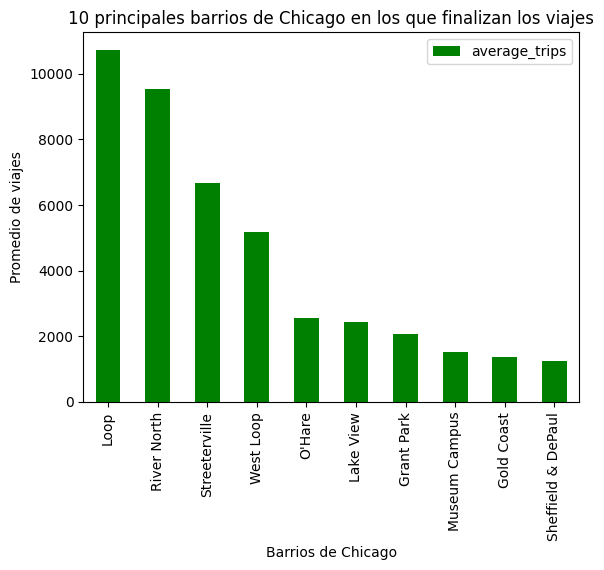

In [16]:
# Gráfica que nos muestra los 10 principales barrios de destino
top10_location.plot(
    kind='bar',
    color= 'green',
    x= 'dropoff_location_name',
    y= 'average_trips',
    xlabel= 'Barrios de Chicago',
    ylabel= 'Promedio de viajes',
    title= '10 principales barrios de Chicago en los que finalizan los viajes'
)
plt.show()

Loop es el barrio de mayor destino en Chicago, seguido de River North; ambos barrios connotados por sus restaurantes -según información turística-; probablemente sean los barrios de mayor atractivo de Chicago o los más centricos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, se muestra una gráfica clara de los top 10 principales destinos. 
</div>

#### Principales empresas de viaje

In [17]:
# Hallar las empresas más solicitadas
top_company = company_df.sort_values(by='trips_amount', ascending=False).head(10)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


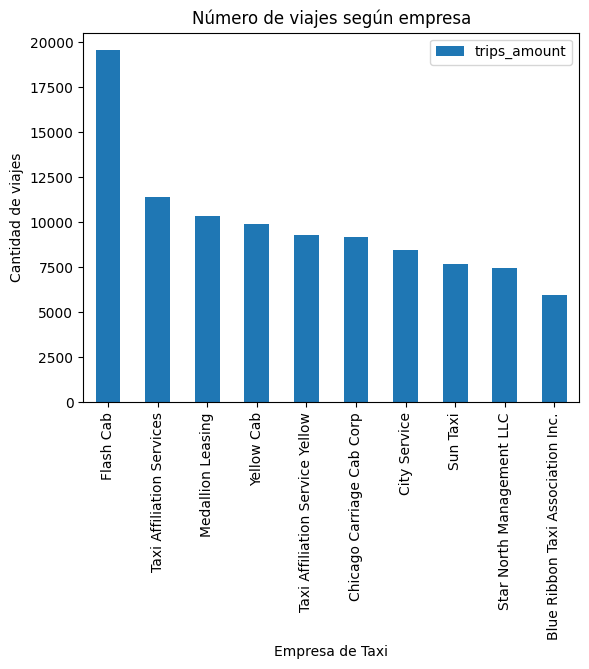

In [18]:
# Graficar cantidad de viajes según empresa
top_company.plot(
    kind='bar',
    x= 'company_name',
    y= 'trips_amount',
    xlabel= 'Empresa de Taxi',
    ylabel= 'Cantidad de viajes',
    title= 'Número de viajes según empresa'
)
plt.show()

Se visualiza una diferencia considerable entre la empresa "Flash Cab" y las otras; pues lidera notablemente mientras las demás se podrían agrupar sin una diferencia tan grande. Flash Cab sobrepasa en más de 17mil viajes al promedio de todas las empresas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Es una gráfica clara y una conclusión bastante acertada respecto a lo mostrado
</div>

#### Duraciones de los viajes hacia el aeropuerto

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

A partir de aquí no puedo continuar con la revisión debido a que se está utilizando una variable que no se ha definido antes. Estos errores suelen suceder porque cuando trabajamos en nuestro equipo y al hacer cambios se suelen borrar celdas pero la variable continúa en memoria por lo que es fácil que ocurran estos errores al compartir el notebook. Para evitarlo siempre recomiendo que antes de compartir un notebook se reinicie el kernel y se ejecute todas las celdas desde arriba hacia abajo para revisar que no falla la ejecución.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
Qué gran detalle se me pasó! gracias por el feedback; ya arreglé la variable pertinente.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Son cosas que suelen pasar, por eso mejor probar todo y darle unos cuantos clicks al ícono de guardar para asegurarnos que todo vaya bien!
</div>

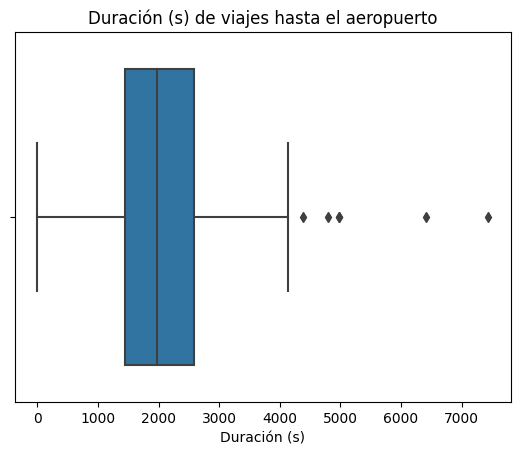

In [19]:
# Duración de los viajes hacia el aeropuerto
sns.boxplot(data= airport_trips_df, x='duration_seconds').set_title('Duración (s) de viajes hasta el aeropuerto')
plt.xlabel('Duración (s)')
plt.show()

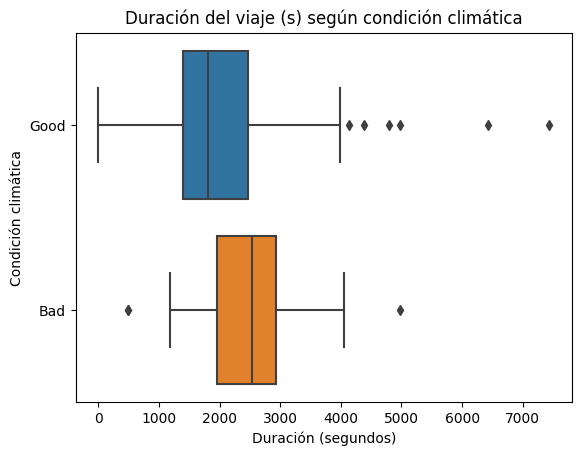

In [20]:
# Hallar duraciones de los viajes según condición climática
sns.boxplot(data= airport_trips_df, x='duration_seconds', y='weather_conditions').set_title('Duración del viaje (s) según condición climática')
plt.xlabel('Duración (segundos)')
plt.ylabel('Condición climática')
plt.show()

Tenemos valores atípicos en la duración de viajes hacia el aeropuerto, tanto si los visualizamos de manera general, como según condición climática, de modo que estos outliers serán eliminados para no interferir en la hipótesis que se busca resolver

In [21]:
# Eliminar outliers:
# Hallar Q1, Q3, IQR
Q1 = airport_trips_df['duration_seconds'].quantile(0.25)
Q3 = airport_trips_df['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Duración de viajes sin outliers
outliers = airport_trips_df[((airport_trips_df['duration_seconds'] < (Q1 - 1.5*IQR)) | (airport_trips_df['duration_seconds'] > (Q3 + 1.5*IQR)))]
trips_without_outliers = airport_trips_df[~((airport_trips_df['duration_seconds'] < (Q1 - 1.5*IQR)) | (airport_trips_df['duration_seconds'] > (Q3 + 1.5*IQR)))]

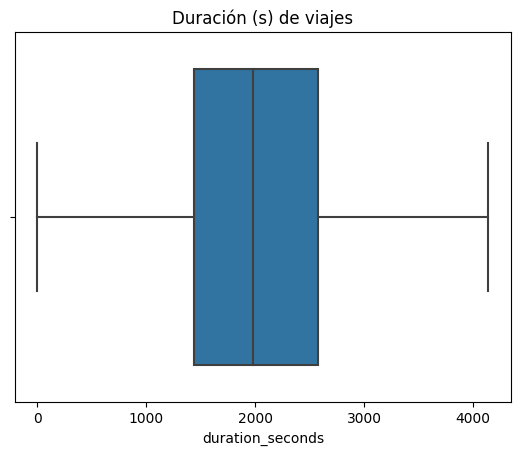

In [22]:
# Duración de viajes hacia el aeropuerto; sin valores atípicos
sns.boxplot(data=trips_without_outliers, x='duration_seconds').set_title('Duración (s) de viajes')
plt.show()

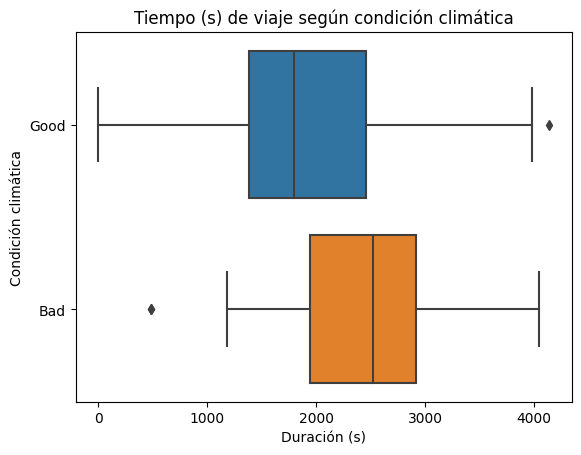

In [23]:
# Duraciones de los viajes según condición climática, sin valores atípicos
sns.boxplot(data=trips_without_outliers, x= 'duration_seconds', y= 'weather_conditions').set_title('Tiempo (s) de viaje según condición climática')
plt.xlabel('Duración (s)')
plt.ylabel('Condición climática')
plt.show()

De acuerdo con las gráficas es posible apreciar una mayor duración promedio de los viajes hacia el aeropuerto cuando se tienen malas condiciones climáticas, lo cual se verificará con una prueba de hipótesis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo revisando y tratando los valores atípicos, estos valores pueden llegar a alterar los resultados de pruebas hipótesis o cálculo de las métricas en tu proyecto
</div>

### Hipótesis

- Cómo se plantean las Hipotesis nula y alternativa?  
La Hipótesis alternativa plantea lo que quiero comprobar, en este caso; que hay diferencias en la duración de los viajes hacia el aeropuerto según la condición climática; de modo tal que la Hipótesis nula plantea que no existen diferencias en la duración de los viajes según condición climática

* Qué criterio se utilizará para probar la hipótesis?  
Se utilizará la prueba t test para poblaciones independientes, con un valor alpha del 5% como el nivel de probabilidad de rechazar "por error" una hipótesis que en realidad es verdadera.  
Se aplicará el test de Levene para verificar si las varianzas de ambas muestras son similares y con ello determinar el parámetro *equal_var*

In [24]:
H0 = "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia los sábados con mala condición climática"
H1 = "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados con mala condición climática"

good_weather = trips_without_outliers.query('weather_conditions == "Good"')['duration_seconds']
bad_weather = trips_without_outliers.query('weather_conditions == "Bad"')['duration_seconds']
alpha = 0.5

#  significancia Test de Levene: 0.05
st.levene(good_weather, bad_weather)

LeveneResult(statistic=0.24647542861629418, pvalue=0.6196707782686355)

Del test de Levene se obtuvo valor p= 0.619 por tanto las varianzas son diferentes; *equal_var* = True

In [25]:
results = st.ttest_ind(good_weather, bad_weather)
print(results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula, por tanto, la duración promedio de los viajes hacia el aeropuerto si cambia con mala condición climática')
if results.pvalue > alpha:
    print('No podemos rechazar la hipótesis nula, por tanto, la duración promedio de los viajes hacia el aeropuerto no cambia con mala condición climática')

1.2430038032744411e-13
Rechazamos la hipótesis nula, por tanto, la duración promedio de los viajes hacia el aeropuerto si cambia con mala condición climática


### Conclusión

Al buscar las principales empresas de taxis en Chicago, es notoria la diferencia con la que destaca "Flash Cab" con la cantidad de viajes realizados vs las otras compañías, de modo que buscar qué diferencia sus viajes del resto sería un punto relevante para que Zuber prospere como nueva empresa de viajes en Chicago. Así también; tener información respecto a los destinos más solicitados da un inicio para considerar las preferencias de los pasajeros y la disponibilidad de taxis hacia aquellos barrios. 
Por otro lado; considerar factores externos que pueden influenciar una mayor solicitud de viajes o incluso una mayor duración de los mismos como fue posible ver con estos datos; es algo de gran relevancia a considerar para la empresa; pues se observó que en días de lluvia los viajes duran aún más, lo cual puede impactar en la necesidad de considerar mayor cantidad de taxis para esos días con la finalidad de no perder viajes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo Macarena! Aplicaste correctamente la prueba de hipótesis y la analizaste muy bien dejando una conclusión bastante clara.
    
Entender cómo aplicar e interpretar las pruebas de hipótesis son un paso importante para cuando hagas pruebas AB más adelante, puesto que el resultado y una buena interpretación será la clave para la toma de decisiones en esa prueba.
    
Saludos!
</div>